# Pré-processamento

- Autor: Lucas Dias Noronha
- Ano: 2025
- Objetivo: Limpar, transformar e preparar os dados brutos para análise/modelagem

# Carregando Dependências

In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))  # sobe um nível e adiciona ao path

import numpy as np
import pandas as pd
from src.visualization.hist import PlotHist


In [10]:
db = pd.read_csv("../data/raw/dados_veiculos.csv")

In [3]:
db.head()
db.tail()

,ID do veículo,data,tempo de viagem,velocidade média,consumo de combustível,carga transportada,ID do motorista,feedback do cliente.
95,96,2022-04-03 20:35:00,40,40,14,180,107,4.6
96,97,2022-04-04 19:30:00,55,35,19,280,108,4.2
97,98,2022-04-05 16:05:00,35,50,11,120,101,4.7
98,99,2022-04-06 17:40:00,40,45,13,150,102,4.3
99,100,2022-04-07 21:30:00,50,40,17,220,104,4.8


Excluindo variáveis do qual não me serão úteis

In [4]:
numeric_db = db.select_dtypes(include=["number"])

total_rows = len(db)

summary_numeric = pd.DataFrame({
    "dtype": numeric_db.dtypes,
    "total_rows": total_rows,
    "n_null": numeric_db.isnull().sum(),
    "n_unique": numeric_db.nunique(),
    "mean": numeric_db.mean().round(2),
    "std": numeric_db.std().round(2),
    "variance": numeric_db.var().round(2),
    "coef_var (%)": ((numeric_db.std() / numeric_db.mean()) * 100).round(2),
    "min": numeric_db.min().round(2),
    "25%": numeric_db.quantile(0.25).round(2),
    "50% (mediana)": numeric_db.median().round(2),
    "75%": numeric_db.quantile(0.75).round(2),
    "max": numeric_db.max().round(2),
    "range": numeric_db.max().round(2) - numeric_db.min().round(2)
})

summary_numeric


,dtype,total_rows,n_null,n_unique,mean,std,variance,coef_var (%),min,25%,50% (mediana),75%,max,range
ID do veículo,int64,100,0,100,50.50,29.01,841.67,57.45,1.0,25.75,50.5,75.25,100.0,99.0
tempo de viagem,int64,100,0,8,39.75,9.54,91.10,24.01,20.0,30.00,40.0,46.25,55.0,35.0
velocidade média,int64,100,0,6,46.85,7.84,61.44,16.73,35.0,40.00,45.0,51.25,60.0,25.0
consumo de combustível,int64,100,0,12,13.49,3.36,11.26,24.88,8.0,10.00,13.0,15.50,20.0,12.0
carga transportada,int64,100,0,11,165.80,64.81,4200.36,39.09,50.0,100.00,150.0,205.00,300.0,250.0
ID do motorista,int64,100,0,8,104.25,2.27,5.14,2.17,101.0,102.00,104.0,106.00,108.0,7.0
feedback do cliente.,float64,100,0,12,4.46,0.28,0.08,6.28,3.7,4.20,4.5,4.70,4.9,1.2


In [11]:
print(db.columns.tolist())


['ID do veículo', 'data', 'tempo de viagem', 'velocidade média', 'consumo de combustível', 'carga transportada', 'ID do motorista', 'feedback do cliente']


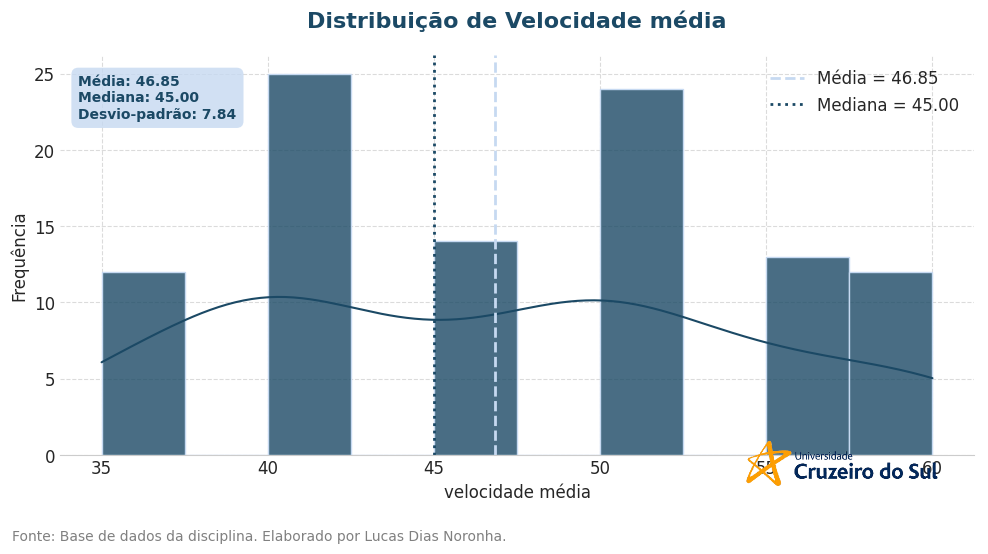

In [12]:
grafico = PlotHist(db, 'velocidade média')
grafico.plot_histograma()

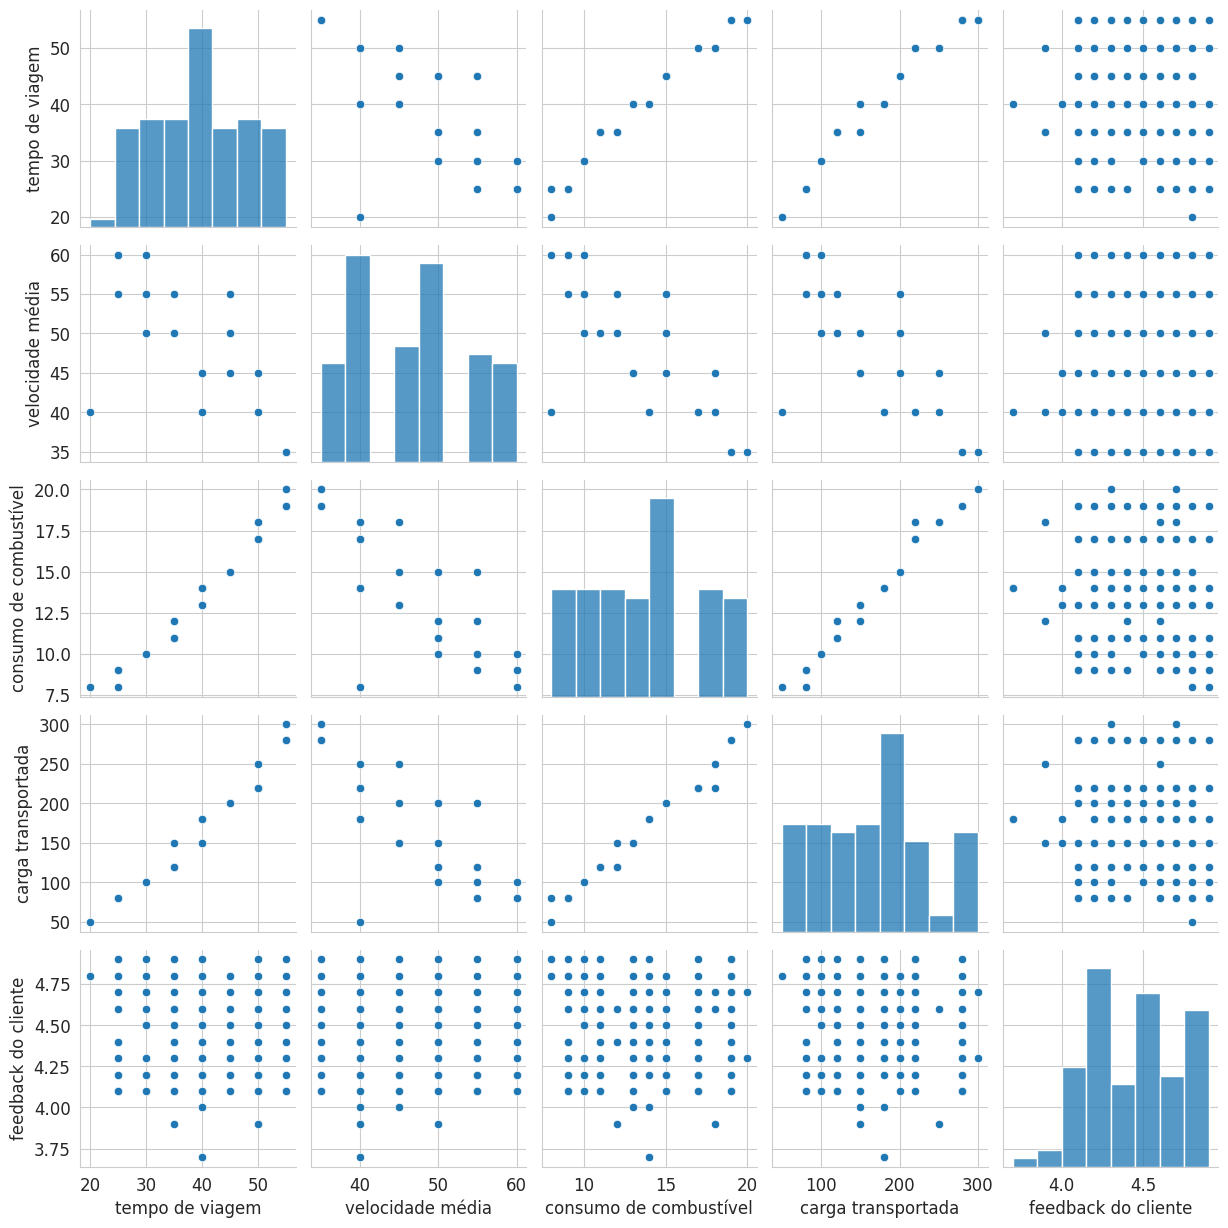

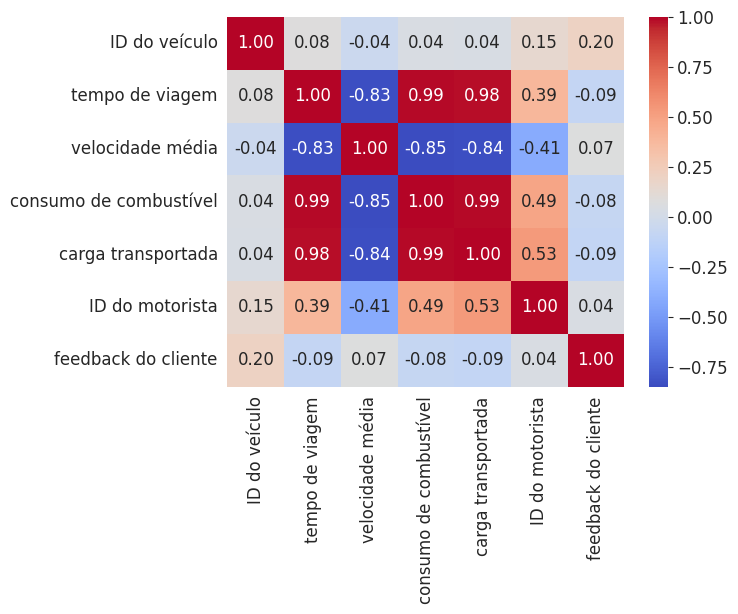

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(db[['tempo de viagem', 'velocidade média', 'consumo de combustível', 'carga transportada', 'feedback do cliente']])
plt.show()

sns.heatmap(db.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [14]:
db.groupby('ID do motorista')[['velocidade média', 'consumo de combustível', 'feedback do cliente']].mean()


,velocidade média,consumo de combustível,feedback do cliente
ID do motorista,,,
101,50.357143,11.214286,4.400000
102,46.428571,12.714286,4.464286
103,54.285714,9.857143,4.514286
104,41.153846,17.000000,4.461538
105,47.916667,15.166667,4.375000
106,56.250000,10.250000,4.491667
107,39.545455,14.545455,4.500000
108,35.000000,19.000000,4.460000


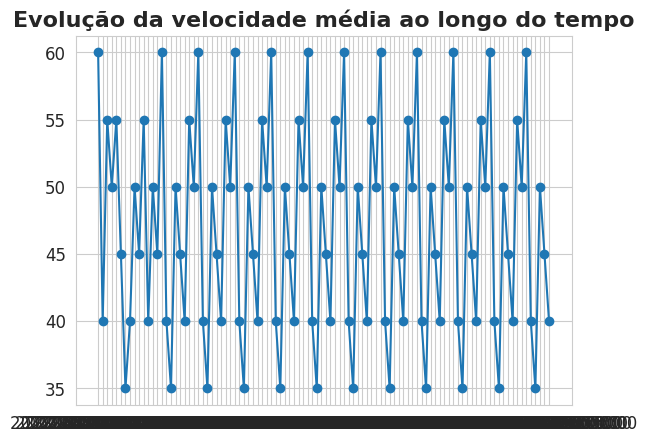

In [15]:
db = db.sort_values('data')
plt.plot(db['data'], db['velocidade média'], marker='o')
plt.title('Evolução da velocidade média ao longo do tempo')
plt.show()
